In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Ocurrence

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot, heatmap, Map

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

#
# Columns of the dataframe
#
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Affiliations', 'Document Type', 'Access Type', 'Source', 'EID',
       'Abstract', 'Author Keywords', 'Index Keywords', 'References',
       'keywords', 'CONF', 'fingerprint', 'keywords_cleaned', 'ID',
       'top_10_Authors_freq', 'top_10_keywords_freq',
       'top_10_Source_title_freq', 'top_10_Authors_cited_by',
       'top_10_keywords_cited_by', 'top_10_Source_title_cited_by'],
      dtype='object')

## Authors

In [3]:
top_authors = df.documents_by_term("Authors").head(10).Authors
top_authors

0       Arevalo A.
1       Gabbouj M.
2     Hernandez G.
3     Hussain A.J.
4     Iosifidis A.
5    Kanniainen J.
6          Leon D.
7          Nino J.
8      Passalis N.
9      Sandoval J.
Name: Authors, dtype: object

In [4]:
matrix = df.occurrence(column="Authors", as_matrix=True)
matrix = matrix.loc[top_authors, top_authors]
heatmap(matrix)

,Arevalo A.,Gabbouj M.,Hernandez G.,Hussain A.J.,Iosifidis A.,Kanniainen J.,Leon D.,Nino J.,Passalis N.,Sandoval J.
Arevalo A.,3,0,3,0,0,0,3,3,0,3
Gabbouj M.,0,3,0,0,3,3,0,0,3,0
Hernandez G.,3,0,3,0,0,0,3,3,0,3
Hussain A.J.,0,0,0,3,0,0,0,0,0,0
Iosifidis A.,0,3,0,0,3,3,0,0,3,0
Kanniainen J.,0,3,0,0,3,3,0,0,3,0
Leon D.,3,0,3,0,0,0,3,3,0,3
Nino J.,3,0,3,0,0,0,3,3,0,3
Passalis N.,0,3,0,0,3,3,0,0,3,0
Sandoval J.,3,0,3,0,0,0,3,3,0,3


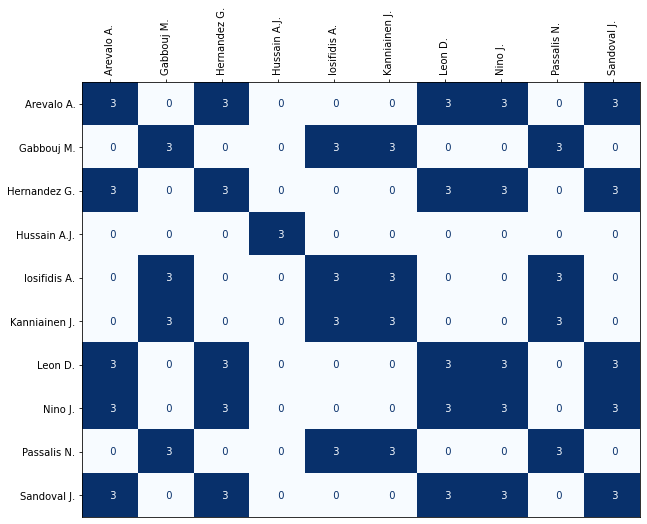

In [5]:
plt.figure(figsize=(10, 8))
Plot(matrix).heatmap(cmap='Blues')

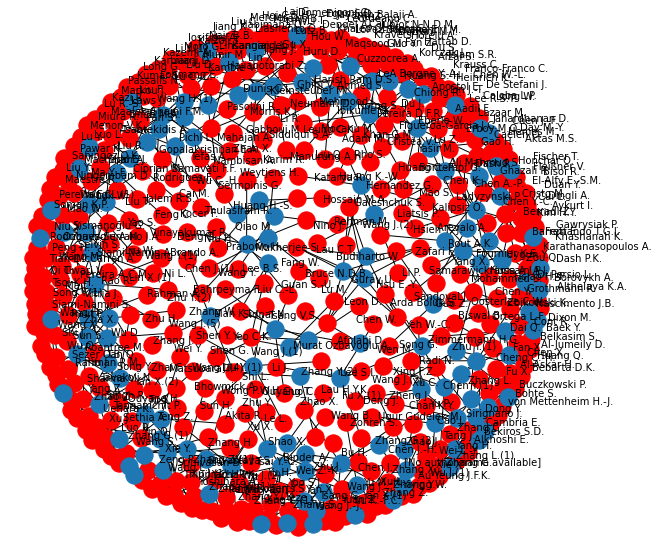

In [6]:
plt.figure(figsize=(10, 10))
dic1 = df.occurrence_map(column="Authors")


dic2 = dict(
    term_props={"node_color": "red"},
    label_docs_props={"font_color": "lightblue"},
    label_term_props=dict(ma="left", rotation=0, fontsize=10, disp=3, bbox=None),
)
kwargs = {**dic1, **dic2}
Map().ocurrence_map(**kwargs)

## Keywords

In [7]:
#
# Analysis for top 10 most frequent keywords
#
top_keywords = df.documents_by_term("keywords_cleaned", sep=';').head(10).keywords_cleaned
top_keywords

0                       forecasting
1                       time series
2                            market
3                     deep learning
4                   neural networks
5                           trading
6                          commerce
7         recurrent neural networks
8    long short term memory network
9                        prediction
Name: keywords_cleaned, dtype: object

In [8]:
matrix = df.occurrence(column="keywords_cleaned", sep=';', as_matrix=True)
matrix = matrix.loc[top_keywords, top_keywords]
heatmap(matrix)

,forecasting,time series,market,deep learning,neural networks,trading,commerce,recurrent neural networks,long short term memory network,prediction
forecasting,110,78,65,56,50,53,48,44,41,41
time series,78,95,51,49,51,42,43,37,30,37
market,65,51,78,44,42,51,53,32,33,28
deep learning,56,49,44,70,31,32,40,17,19,22
neural networks,50,51,42,31,70,40,37,29,13,23
trading,53,42,51,32,40,66,42,26,27,19
commerce,48,43,53,40,37,42,62,22,21,22
recurrent neural networks,44,37,32,17,29,26,22,52,14,22
long short term memory network,41,30,33,19,13,27,21,14,49,11
prediction,41,37,28,22,23,19,22,22,11,46


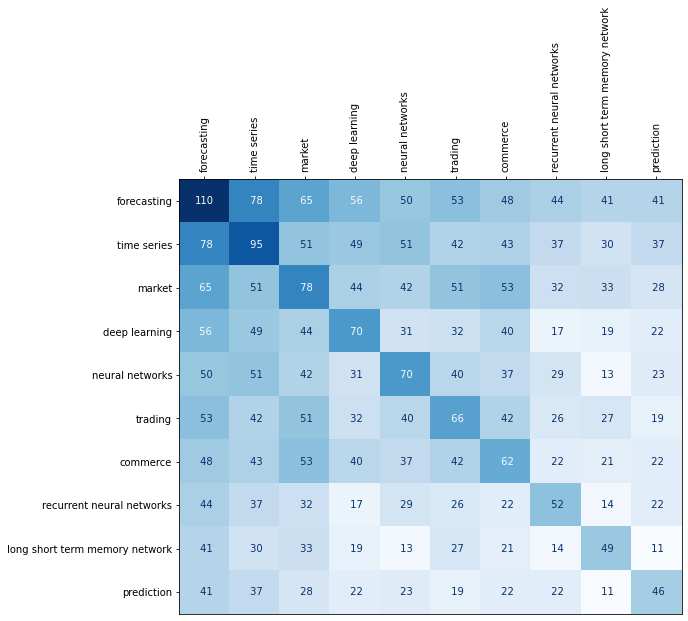

In [9]:
plt.figure(figsize=(9, 8))
Plot(matrix).heatmap(cmap='Blues')